In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-diffadv-heat)

In [2]:
m, n = (60, 25)
x, Dx, Dxx = FNC.diffper(m, [-1, 1])
y, Dy, Dyy = FNC.diffper(n, [-1, 1])
mtx = f -> [f(x, y) for x in x, y in y]
unvec = z -> reshape(z, m, n);

Note that the initial condition should also be periodic on the domain.

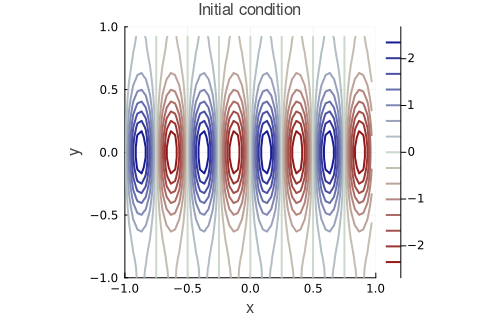

In [3]:
u_init = (x, y) -> sin(4 * π * x) * exp(cos(π * y))
U₀ = mtx(u_init)
M = maximum(abs, U₀)
contour(x, y, U₀';
    color=:redsblues,  clims=(-M, M), 
    aspect_ratio=1,
    xaxis=("x", (-1, 1)),  yaxis=("y", (-1, 1)), 
    title="Initial condition" )

This function computes the time derivative for the unknowns. The actual calculations take place using the matrix shape.

In [4]:
function du_dt(u, α, t)
    U = unvec(u)
    Uxx = Dxx * U
    Uyy = U * Dyy'            # 2nd partials
    du_dt = α * (Uxx + Uyy)    # PDE
    return vec(du_dt)
end;

Since this problem is parabolic, a stiff integrator is appropriate.

In [5]:
using OrdinaryDiffEq
IVP = ODEProblem(du_dt, vec(U₀), (0, 0.2), 0.1)
sol = solve(IVP, Rodas4P());

Here is an animation of the solution.
```{tip}
:class: dropdown
Here `clims` are set so that colors remain at fixed values throughout the animation.
```

In [6]:
anim = @animate for t in range(0, 0.2, 81)
    surface(x, y, unvec(sol(t))';
        color=:redsblues,  clims=(-M, M),
        xaxis=(L"x", (-1, 1)), 
        yaxis=(L"y", (-1, 1)), 
        zlims=(-M, M),
        title=@sprintf("Heat equation, t=%.3f", t),
        dpi=150, colorbar=:none)
end
closeall();
mp4(anim, "diffadv-heat.mp4");

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc/chapter13/section2/julia/diffadv-heat.mp4


![Heat equation in 2d](diffadv-heat.mp4)